In [1]:
import pandas as pd
import numpy as np

# Importing necessary libraries

In [2]:
# Importing message.csv from review.csv
messages = pd.read_csv('/kaggle/input/tourist/messages.csv')

In [5]:
messages.shape

(98285, 2)

In [6]:
# importing cleaned data
df1 = pd.read_csv('/kaggle/input/tourist/fake_data_cleaned.csv')

In [7]:
#displaying top 5 records of df1
df1.head()

,label,text_
0,1,love well made sturdy comfortable love pretty
1,1,love great upgrade original mine couple year
2,1,pillow saved back love look feel pillow
3,1,missing information use great product price
4,1,nice set good quality set two month


In [8]:
# checking number of rows and columns
df1.shape

(40432, 2)

In [9]:
# changing column text_ into text
df1.columns = ['label' , 'text']

In [10]:
# checking null values and datatype of each column
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   40432 non-null  int64 
 1   text    40431 non-null  object
dtypes: int64(1), object(1)
memory usage: 631.9+ KB


In [11]:
# displaying row number where the null value exist

import numpy as np
np.where(df1.text.isnull())

(array([37914]),)

In [12]:
# dropping the row having null value
df1.drop([37914] , inplace = True)

In [13]:
# checking null values and datatype of each column
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40431 entries, 0 to 40431
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   40431 non-null  int64 
 1   text    40431 non-null  object
dtypes: int64(1), object(1)
memory usage: 947.6+ KB


In [14]:
# concating the dataset df1 and messages
# df1 --> labeled dataset
# messages --> scrapped dataset
data = pd.concat([df1 , messages] , axis = 0)

In [15]:
# reseting the index
data.index = range(len(data))
data.tail() # displaying bottom 5 records

,label,text
138711,0,Exceptional hospitality in every way at Triden...
138712,0,I have had the privilege of staying at 5 star ...
138713,0,A lovely experience at Trident. The atmosphere...
138714,0,""" thanks to trident .The service of the hotel ..."
138715,0,Thanks to trident agra we loved it here and en...


## TFIDF 

In [16]:
# importing library 
from sklearn.feature_extraction.text import TfidfVectorizer

#creating object vectorizer
vectorizer = TfidfVectorizer(max_features = 10000) #limiting the number of features to 10000
vectorized_corpus = vectorizer.fit_transform(data['text']).toarray() #coverting text column into array

df_temp = pd.DataFrame(vectorized_corpus,columns=vectorizer.get_feature_names_out())

print(df_temp) #printing the rows and columns

         00  000  00am  00pm   01   02   03   05   06   09  ...  zirakpur  \
0       0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
1       0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
2       0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
3       0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
4       0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
...     ...  ...   ...   ...  ...  ...  ...  ...  ...  ...  ...       ...   
138711  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
138712  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
138713  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
138714  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
138715  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   

        zodiac  zomato  zombie  zone  zones  zoo  zoom  zoya   और  
0      

In [17]:
# printing vectorized_corpus
print(vectorized_corpus)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
# printing count of each vectorizer
vectorizer.vocabulary_

{'love': 5181,
 'well': 9758,
 'made': 5225,
 'sturdy': 8568,
 'comfortable': 1903,
 'pretty': 6724,
 'great': 3847,
 'upgrade': 9395,
 'original': 6103,
 'mine': 5552,
 'couple': 2160,
 'year': 9951,
 'pillow': 6462,
 'saved': 7652,
 'back': 826,
 'look': 5156,
 'feel': 3308,
 'missing': 5576,
 'information': 4429,
 'use': 9426,
 'product': 6774,
 'price': 6729,
 'nice': 5862,
 'set': 7823,
 'good': 3782,
 'quality': 6896,
 'two': 9289,
 'month': 5641,
 'wanted': 9666,
 'different': 2570,
 'flavor': 3410,
 'perfect': 6366,
 'touch': 9119,
 'thing': 8968,
 'wish': 9851,
 'little': 5111,
 'space': 8269,
 'done': 2717,
 'fit': 3388,
 'edge': 2869,
 'extra': 3202,
 'big': 1097,
 'number': 5952,
 'easy': 2850,
 'read': 7046,
 'like': 5064,
 'size': 8072,
 'son': 8215,
 'also': 407,
 'baby': 825,
 'advertised': 287,
 'th': 8916,
 'one': 6038,
 'problem': 6764,
 'really': 7063,
 'handy': 3975,
 'kid': 4800,
 'tool': 9099,
 'included': 4383,
 'package': 6170,
 'someone': 8207,
 'say': 7661,
 

In [19]:
# checking number of rows and columns
vectorized_corpus.shape

(138716, 10000)

In [20]:
# putting the labeled data into X to train the model
X = vectorized_corpus[:40431,:]

In [21]:
# checking number of rows and columns
X.shape

(40431, 10000)

In [22]:
# putting the label column from df1 into y
y = df1.iloc[:,0].values

In [23]:
# checking number of rows and columns
y.shape

(40431,)

In [24]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20 , random_state = 0)

### TFIDF ==> Logistic Regression

In [25]:
# Training a model based on Logistic Regression

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)



<AxesSubplot:>

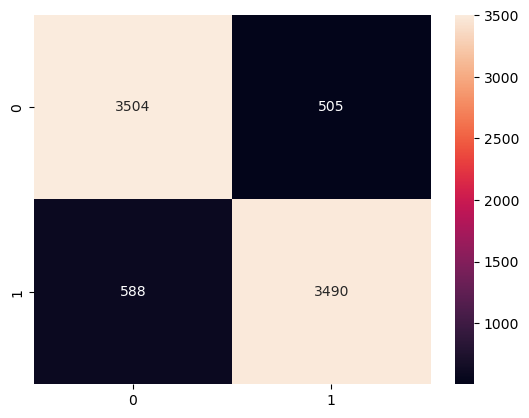

In [26]:
# importing confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test , y_pred)

sns.heatmap(cm , annot = True , fmt = 'g')

In [27]:
#importing accuracy score
from sklearn.metrics import accuracy_score , classification_report

accuracy = accuracy_score(y_test , y_pred)
print(accuracy)
print(classification_report(y_test, y_pred))

0.8648448126622975
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      4009
           1       0.87      0.86      0.86      4078

    accuracy                           0.86      8087
   macro avg       0.86      0.86      0.86      8087
weighted avg       0.87      0.86      0.86      8087



### TFIDF ==> Naive Bayes Classifier

In [28]:
# Training model using Naive Bayes Classifier

from sklearn.naive_bayes import MultinomialNB

fake_detect_model = MultinomialNB().fit(X_train , y_train)

y_pred = fake_detect_model.predict(X_test)

<AxesSubplot:>

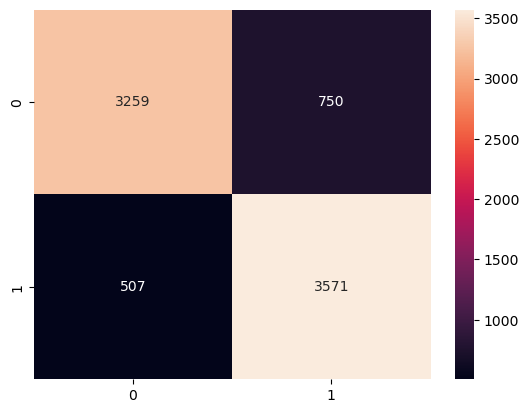

In [29]:
# importing confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , y_pred)

sns.heatmap(cm , annot = True , fmt = 'g')

In [30]:
#importing accuracy score
from sklearn.metrics import accuracy_score , classification_report

accuracy = accuracy_score(y_test , y_pred)
print(accuracy)

print(classification_report(y_test, y_pred))


0.8445653517991839
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      4009
           1       0.83      0.88      0.85      4078

    accuracy                           0.84      8087
   macro avg       0.85      0.84      0.84      8087
weighted avg       0.85      0.84      0.84      8087



## TFIDF ==> RandomFOrestClassifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

<AxesSubplot:>

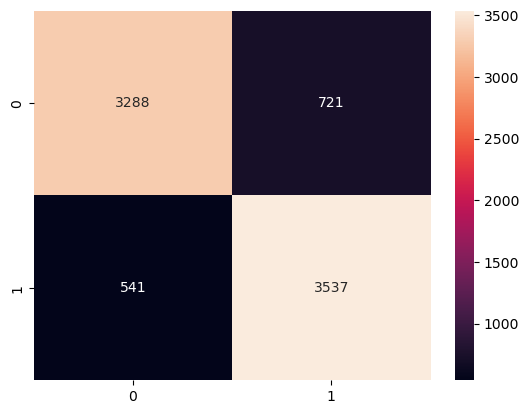

In [32]:
# importing confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , y_pred)

sns.heatmap(cm , annot = True , fmt = 'g')

In [33]:
#importing accuracy score
from sklearn.metrics import accuracy_score , classification_report

accuracy = accuracy_score(y_test , y_pred)
print(accuracy)

print(classification_report(y_test, y_pred))


0.8439470755533572
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      4009
           1       0.83      0.87      0.85      4078

    accuracy                           0.84      8087
   macro avg       0.84      0.84      0.84      8087
weighted avg       0.84      0.84      0.84      8087



In [53]:
# Now we have trained our model to identify fake reviews, and now we will check from our webscraped data 
#how many of the data we have are fake

web_scraped_data = vectorized_corpus[40431:,:]


In [54]:
# checking number of rows and columns
web_scraped_data.shape

(98285, 10000)

In [55]:
# displaying the total number of fake reviews in web_scraped_data
# Logistic Regression
sum(classifier.predict(web_scraped_data))

3307

In [56]:
# displaying the total number of fake reviews in web_scraped_data
# Naive Bayes Classifier
sum(fake_detect_model.predict(web_scraped_data))

12166

In [57]:
# displaying the total number of fake reviews in web_scraped_data
# Random Forest Classifier
sum(clf.predict(web_scraped_data))

8649

In [74]:
df = pd.read_csv('/kaggle/input/tourist/reviews.csv')

In [75]:
df.head()

,Unnamed: 0,city_name,place_to_visit,place_name,reviews
0,0,Kolkata,Restaurants,Ottimo Cucina Italiana,Mr.Prakash Kumar and Mr.Sourav both are one on...
1,1,Kolkata,Restaurants,Ottimo Cucina Italiana,Absolutely great place for gathering and indee...
2,2,Kolkata,Restaurants,Ottimo Cucina Italiana,Pizza was good.Chefs antipasti antipasti selec...
3,3,Kolkata,Restaurants,Ottimo Cucina Italiana,It was a wonderful dinning experience in the r...
4,4,Kolkata,Restaurants,Ottimo Cucina Italiana,Had a really great time with family.\nFood was...


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98623 entries, 0 to 98622
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      98623 non-null  int64 
 1   city_name       98623 non-null  object
 2   place_to_visit  98623 non-null  object
 3   place_name      98623 non-null  object
 4   reviews         98623 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [77]:
df.drop(['Unnamed: 0'] , axis = 1 , inplace = True)
df = df.drop(df.iloc[np.where(df.city_name == 'city_name')].index , axis = 0)

# replacing the value names to avoid duplicacy in the data.

df = df.replace('jaipur' , 'Jaipur')
df = df.replace('agra' , 'Agra')
df = df.replace('Things_to_do' , 'Things')



In [78]:
messages.shape

(98285, 2)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98285 entries, 0 to 98622
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city_name       98285 non-null  object
 1   place_to_visit  98285 non-null  object
 2   place_name      98285 non-null  object
 3   reviews         98285 non-null  object
dtypes: object(4)
memory usage: 3.7+ MB


In [80]:
df.isna().sum()

city_name         0
place_to_visit    0
place_name        0
reviews           0
dtype: int64

In [81]:
web_scraped_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [82]:
# creating a new column fake which determines whether the reviews is fake or original

df['Fake'] = fake_detect_model.predict(web_scraped_data)

In [83]:
#creating new dataframe fake_data and copying only the reviews which are fake
fake_data = df.iloc[np.where(df['Fake'] == 1)]
fake_data

,city_name,place_to_visit,place_name,reviews,Fake
6,Kolkata,Restaurants,Ottimo Cucina Italiana,"Very nice place must visit , interiors are goo...",1
7,Kolkata,Restaurants,Ottimo Cucina Italiana,Great to be announced that this was the best p...,1
9,Kolkata,Restaurants,Ottimo Cucina Italiana,The food was amazing and so fantastically pres...,1
20,Kolkata,Restaurants,Ottimo Cucina Italiana,Had a great experience at the Ottimo. We were ...,1
22,Kolkata,Restaurants,Ottimo Cucina Italiana,Excellent food. Very nice and kind waiters. Wo...,1
...,...,...,...,...,...
98534,Agra,Hotels,Trident,It was the annual family break that we took to...,1
98540,Agra,Hotels,Trident,Top notch hospitality. Each & every staff is ...,1
98543,Agra,Hotels,Trident,Very good Hotel in Agra. Nice and clean room.G...,1
98563,Agra,Hotels,Trident,It’s was a great experience I just loved the a...,1


In [84]:
#dropping fake reviews from the web scraped data
df.drop(fake_data.index , axis = 0 , inplace = True)

In [85]:
# checking number of rows and columns
df.shape

(86119, 5)

In [87]:
# Number of review having length <135

sum(df.reviews.str.len() < 135)

10698

In [88]:
# dopping reviews which has length less than 135 characters
df.drop( df.iloc[np.where(df.reviews.str.len() < 135)].index , axis = 0 , inplace = True)

In [89]:
# resetting the index
df.reset_index(inplace = True , drop = True)
df.shape

(75421, 5)

In [91]:
del messages
del df1
del fake_data
del X_train 
del X_test
del y_train
del y_test
del X
del y
del df_temp
del vectorized_corpus
del data
del classifier
del web_scraped_data

NameError: name 'messages' is not defined

## VADER 

In [92]:
pip install vaderSentiment


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER uses a combination of A sentiment lexicon is a list of lexical features (e.g., words) which are generally labeled according to their semantic orientation as either positive or negative. VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.

In [93]:
#import libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#To get the progress bar

from tqdm import tqdm , trange

def sentiment_scores(sentence):

    sia_obj = SentimentIntensityAnalyzer() #creating object

    sentiment_dict = sia_obj.polarity_scores(sentence) #
    
    return sentiment_dict

sentiment_data = [] #creating list

for i in trange(len(df)):

    sentiment_data.append(sentiment_scores(df['reviews'][i])['compound'])
    # we are generating compound scores of each sentence


100%|██████████| 75421/75421 [18:34<00:00, 67.65it/s]


In [94]:
# creating column score
df['score_V'] = sentiment_data

In [95]:
# displaying top 5 records 
df.head()

,city_name,place_to_visit,place_name,reviews,Fake,score_V
0,Kolkata,Restaurants,Ottimo Cucina Italiana,Mr.Prakash Kumar and Mr.Sourav both are one on...,0,0.8908
1,Kolkata,Restaurants,Ottimo Cucina Italiana,Absolutely great place for gathering and indee...,0,0.9821
2,Kolkata,Restaurants,Ottimo Cucina Italiana,It was a wonderful dinning experience in the r...,0,0.8316
3,Kolkata,Restaurants,Ottimo Cucina Italiana,Had a really great time with family.\nFood was...,0,0.9427
4,Kolkata,Restaurants,Ottimo Cucina Italiana,"Excellent food and service, especially prakash...",0,0.9451


In [96]:
# Total number of postive reviews having score greater than 0.05
pos = sum(df.score_V > 0.05)
print("Total number of postive reviews : ",pos)

Total number of postive reviews :  69994


In [97]:
#Total number of neutral reviews having score greater than -0.05 and less than 0.05
n = sum( (df.score_V < 0.05) & (df.score_V > -0.05) )

print("Total number of neutral reviews : ",n)

Total number of neutral reviews :  1333


In [98]:
#Total number of negative reviews having score less than -0.05
neg = sum(df.score_V < -0.05)

print("Total number of negative reviews : ",neg)

Total number of negative reviews :  4091


In [99]:
df.head()

,city_name,place_to_visit,place_name,reviews,Fake,score_V
0,Kolkata,Restaurants,Ottimo Cucina Italiana,Mr.Prakash Kumar and Mr.Sourav both are one on...,0,0.8908
1,Kolkata,Restaurants,Ottimo Cucina Italiana,Absolutely great place for gathering and indee...,0,0.9821
2,Kolkata,Restaurants,Ottimo Cucina Italiana,It was a wonderful dinning experience in the r...,0,0.8316
3,Kolkata,Restaurants,Ottimo Cucina Italiana,Had a really great time with family.\nFood was...,0,0.9427
4,Kolkata,Restaurants,Ottimo Cucina Italiana,"Excellent food and service, especially prakash...",0,0.9451


In [100]:
# creating a grouping of dataframe by palce_name
grp = df.groupby('place_name')

df['avg_score'] = grp['score_V'].transform(np.mean) #creating avg_score column by taking average of score

In [101]:
df.head()

df1 = df.copy()

In [102]:
# displaying unique values of each column of dataframe
df.nunique()

city_name            12
place_to_visit        5
place_name          332
reviews           71398
Fake                  1
score_V            7089
avg_score           324
dtype: int64

In [103]:
df.drop_duplicates(subset = ['place_name'] , inplace = True) # dropping duplicate place_name

df.drop(['Fake' , 'reviews' , 'score_V'] , axis = 1 , inplace = True) #dropping unnecessary columns

df.reset_index(inplace = True , drop = True) #resetting index

df

,city_name,place_to_visit,place_name,avg_score
0,Kolkata,Restaurants,Ottimo Cucina Italiana,0.843885
1,Kolkata,Restaurants,6 Ballygunge Place,0.584400
2,Kolkata,Restaurants,Oh! Calcutta,0.645146
3,Kolkata,Restaurants,Grand Market Pavilion,0.863878
4,Kolkata,Restaurants,Dum Phukt,0.749865
...,...,...,...,...
327,Agra,Hotels,Hotel_Taj_Resorts,0.826703
328,Agra,Hotels,Howard_Plaza,0.777425
329,Agra,Hotels,Jaypee_Palace_Hotel,0.883915
330,Agra,Hotels,Tajview_Agra,0.762051


In [104]:
# rounding of the values upto 3 decimal places
df['avg_score'] = df.avg_score.round(3)

In [105]:
df

,city_name,place_to_visit,place_name,avg_score
0,Kolkata,Restaurants,Ottimo Cucina Italiana,0.844
1,Kolkata,Restaurants,6 Ballygunge Place,0.584
2,Kolkata,Restaurants,Oh! Calcutta,0.645
3,Kolkata,Restaurants,Grand Market Pavilion,0.864
4,Kolkata,Restaurants,Dum Phukt,0.750
...,...,...,...,...
327,Agra,Hotels,Hotel_Taj_Resorts,0.827
328,Agra,Hotels,Howard_Plaza,0.777
329,Agra,Hotels,Jaypee_Palace_Hotel,0.884
330,Agra,Hotels,Tajview_Agra,0.762


In [106]:
# count of avg_score 
df.sort_values('avg_score' , ascending = False).groupby('city_name').count()

,place_to_visit,place_name,avg_score
city_name,,,
Agra,23,23,23
Ahmedabad,29,29,29
Bangalore,30,30,30
Chandigarh,30,30,30
Delhi,30,30,30
Goa,30,30,30
Jaipur,28,28,28
Kolkata,30,30,30
Mumbai,30,30,30


In [107]:
# sorting of avg_score in descending order
sorted_df = df.groupby(['city_name','place_to_visit']).apply(lambda x: x.sort_values('avg_score' , ascending = False))
sorted_df = sorted_df.reset_index(drop=True) #resetting the index


In [108]:
#diplaying sorted df
sorted_df

,city_name,place_to_visit,place_name,avg_score
0,Agra,Hotels,Holiday_Inn,0.914
1,Agra,Hotels,Bansi_Home_Stay,0.892
2,Agra,Hotels,Jaypee_Palace_Hotel,0.884
3,Agra,Hotels,Hotel_Taj_Resorts,0.827
4,Agra,Hotels,The_Grand_Imperial,0.785
...,...,...,...,...
327,Varanasi,Restaurant,Brown_Bread_Bakery,0.456
328,Varanasi,Things,Assi_Ghat,0.695
329,Varanasi,Things,Dasaswamedh_Ghat,0.668
330,Varanasi,Things,Banaras_Ghats,0.665


In [109]:
#converting dataset to csv file
sorted_df.to_csv('reviews_cleaned1.csv' , index = False)

## Roberta PreTrained Model

* Use a model trained of a large corpus of data.
*  model accounts for the words but also the context related to other words.

In [110]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [111]:
df1.head()

,city_name,place_to_visit,place_name,reviews,Fake,score_V,avg_score
0,Kolkata,Restaurants,Ottimo Cucina Italiana,Mr.Prakash Kumar and Mr.Sourav both are one on...,0,0.8908,0.843885
1,Kolkata,Restaurants,Ottimo Cucina Italiana,Absolutely great place for gathering and indee...,0,0.9821,0.843885
2,Kolkata,Restaurants,Ottimo Cucina Italiana,It was a wonderful dinning experience in the r...,0,0.8316,0.843885
3,Kolkata,Restaurants,Ottimo Cucina Italiana,Had a really great time with family.\nFood was...,0,0.9427,0.843885
4,Kolkata,Restaurants,Ottimo Cucina Italiana,"Excellent food and service, especially prakash...",0,0.9451,0.843885


In [112]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [113]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [117]:
# Run for Roberta Model

sentiment_data = []

for i in trange(len(df1)):

    encoded_text = tokenizer(df1['reviews'][i], return_tensors='pt' , max_length=512, truncation=True)
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    
    compound = (scores_dict['roberta_neg'] + (scores_dict['roberta_neu'] * 2) + scores_dict['roberta_pos'] * 3) -2    
    
    sentiment_data.append(compound)


100%|██████████| 75421/75421 [3:27:31<00:00,  6.06it/s]  


In [118]:
# creating column score
df1['score_R'] = sentiment_data

In [119]:
# displaying top 5 records 
df1.head()

,city_name,place_to_visit,place_name,reviews,Fake,score_V,avg_score,score_R
0,Kolkata,Restaurants,Ottimo Cucina Italiana,Mr.Prakash Kumar and Mr.Sourav both are one on...,0,0.8908,0.843885,0.964326
1,Kolkata,Restaurants,Ottimo Cucina Italiana,Absolutely great place for gathering and indee...,0,0.9821,0.843885,0.985456
2,Kolkata,Restaurants,Ottimo Cucina Italiana,It was a wonderful dinning experience in the r...,0,0.8316,0.843885,0.988717
3,Kolkata,Restaurants,Ottimo Cucina Italiana,Had a really great time with family.\nFood was...,0,0.9427,0.843885,0.982445
4,Kolkata,Restaurants,Ottimo Cucina Italiana,"Excellent food and service, especially prakash...",0,0.9451,0.843885,0.988928


In [120]:
# Total number of postive reviews having score greater than 0.05
pos = sum(df1.score_R > 0.05)
print("Total number of postive reviews : ",pos)

Total number of postive reviews :  69008


In [122]:
#Total number of neutral reviews having score greater than -0.05 and less than 0.05
n = sum( (df1.score_R < 0.05) & (df1.score_R > -0.05) )

print("Total number of neutral reviews : ",n)

Total number of neutral reviews :  574


In [123]:
#Total number of negative reviews having score less than -0.05
neg = sum(df1.score_R < -0.05)

print("Total number of negative reviews : ",neg)

Total number of negative reviews :  5839


In [124]:
df1.head()

,city_name,place_to_visit,place_name,reviews,Fake,score_V,avg_score,score_R
0,Kolkata,Restaurants,Ottimo Cucina Italiana,Mr.Prakash Kumar and Mr.Sourav both are one on...,0,0.8908,0.843885,0.964326
1,Kolkata,Restaurants,Ottimo Cucina Italiana,Absolutely great place for gathering and indee...,0,0.9821,0.843885,0.985456
2,Kolkata,Restaurants,Ottimo Cucina Italiana,It was a wonderful dinning experience in the r...,0,0.8316,0.843885,0.988717
3,Kolkata,Restaurants,Ottimo Cucina Italiana,Had a really great time with family.\nFood was...,0,0.9427,0.843885,0.982445
4,Kolkata,Restaurants,Ottimo Cucina Italiana,"Excellent food and service, especially prakash...",0,0.9451,0.843885,0.988928


In [125]:
# creating a grouping of dataframe by palce_name
grp = df1.groupby('place_name')

df1['avg_scoreR'] = grp['score_R'].transform(np.mean) #creating avg_score column by taking average of score

In [126]:
df1.head()

,city_name,place_to_visit,place_name,reviews,Fake,score_V,avg_score,score_R,avg_scoreR
0,Kolkata,Restaurants,Ottimo Cucina Italiana,Mr.Prakash Kumar and Mr.Sourav both are one on...,0,0.8908,0.843885,0.964326,0.943288
1,Kolkata,Restaurants,Ottimo Cucina Italiana,Absolutely great place for gathering and indee...,0,0.9821,0.843885,0.985456,0.943288
2,Kolkata,Restaurants,Ottimo Cucina Italiana,It was a wonderful dinning experience in the r...,0,0.8316,0.843885,0.988717,0.943288
3,Kolkata,Restaurants,Ottimo Cucina Italiana,Had a really great time with family.\nFood was...,0,0.9427,0.843885,0.982445,0.943288
4,Kolkata,Restaurants,Ottimo Cucina Italiana,"Excellent food and service, especially prakash...",0,0.9451,0.843885,0.988928,0.943288


In [127]:

# displaying unique values of each column of dataframe
df1.nunique()

city_name            12
place_to_visit        5
place_name          332
reviews           71398
Fake                  1
score_V            7089
avg_score           324
score_R           71393
avg_scoreR          324
dtype: int64

In [128]:
df1.drop_duplicates(subset = ['place_name'] , inplace = True) # dropping duplicate place_name

df1.drop(['Fake' , 'reviews' , 'score_R'] , axis = 1 , inplace = True) #dropping unnecessary columns

df1.reset_index(inplace = True , drop = True) #resetting index

df1

,city_name,place_to_visit,place_name,score_V,avg_score,avg_scoreR
0,Kolkata,Restaurants,Ottimo Cucina Italiana,0.8908,0.843885,0.943288
1,Kolkata,Restaurants,6 Ballygunge Place,0.9509,0.584400,0.675853
2,Kolkata,Restaurants,Oh! Calcutta,0.8622,0.645146,0.707073
3,Kolkata,Restaurants,Grand Market Pavilion,0.9259,0.863878,0.920425
4,Kolkata,Restaurants,Dum Phukt,0.9118,0.749865,0.857513
...,...,...,...,...,...,...
327,Agra,Hotels,Hotel_Taj_Resorts,0.9686,0.826703,0.839932
328,Agra,Hotels,Howard_Plaza,0.9724,0.777425,0.749570
329,Agra,Hotels,Jaypee_Palace_Hotel,0.9864,0.883915,0.905188
330,Agra,Hotels,Tajview_Agra,0.9802,0.762051,0.702158


In [130]:
# rounding of the values upto 3 decimal places
df1['avg_scoreR'] = df1.avg_scoreR.round(3)

In [131]:
df1

,city_name,place_to_visit,place_name,score_V,avg_score,avg_scoreR
0,Kolkata,Restaurants,Ottimo Cucina Italiana,0.8908,0.843885,0.943
1,Kolkata,Restaurants,6 Ballygunge Place,0.9509,0.584400,0.676
2,Kolkata,Restaurants,Oh! Calcutta,0.8622,0.645146,0.707
3,Kolkata,Restaurants,Grand Market Pavilion,0.9259,0.863878,0.920
4,Kolkata,Restaurants,Dum Phukt,0.9118,0.749865,0.858
...,...,...,...,...,...,...
327,Agra,Hotels,Hotel_Taj_Resorts,0.9686,0.826703,0.840
328,Agra,Hotels,Howard_Plaza,0.9724,0.777425,0.750
329,Agra,Hotels,Jaypee_Palace_Hotel,0.9864,0.883915,0.905
330,Agra,Hotels,Tajview_Agra,0.9802,0.762051,0.702


In [133]:
# count of avg_score 
df1.sort_values('avg_scoreR' , ascending = False).groupby('city_name').count()

,place_to_visit,place_name,score_V,avg_score,avg_scoreR
city_name,,,,,
Agra,23,23,23,23,23
Ahmedabad,29,29,29,29,29
Bangalore,30,30,30,30,30
Chandigarh,30,30,30,30,30
Delhi,30,30,30,30,30
Goa,30,30,30,30,30
Jaipur,28,28,28,28,28
Kolkata,30,30,30,30,30
Mumbai,30,30,30,30,30


In [135]:
# sorting of avg_score in descending order
sorted_df = df1.groupby(['city_name','place_to_visit']).apply(lambda x: x.sort_values('avg_scoreR' , ascending = False))
sorted_df = sorted_df.reset_index(drop=True) #resetting the index


In [136]:
#diplaying sorted df
sorted_df

,city_name,place_to_visit,place_name,score_V,avg_score,avg_scoreR
0,Agra,Hotels,Holiday_Inn,0.8126,0.914462,0.941
1,Agra,Hotels,Jaypee_Palace_Hotel,0.9864,0.883915,0.905
2,Agra,Hotels,Bansi_Home_Stay,0.8860,0.891969,0.882
3,Agra,Hotels,Hotel_Taj_Resorts,0.9686,0.826703,0.840
4,Agra,Hotels,Howard_Plaza,0.9724,0.777425,0.750
...,...,...,...,...,...,...
327,Varanasi,Restaurant,Brown_Bread_Bakery,0.0828,0.455673,0.383
328,Varanasi,Things,Assi_Ghat,0.0000,0.694993,0.735
329,Varanasi,Things,Sarnath,0.8313,0.647928,0.710
330,Varanasi,Things,Banaras_Ghats,0.9778,0.665100,0.598


In [137]:
sorted_df.to_csv('reviews_cleaned2.csv' , index = False)

In [141]:
dfr = pd.read_csv('reviews_cleaned2.csv')

In [140]:
dfr.head()

,city_name,place_to_visit,place_name,score_V,avg_score,avg_scoreR
0,Agra,Hotels,Holiday_Inn,0.8126,0.914462,0.941
1,Agra,Hotels,Jaypee_Palace_Hotel,0.9864,0.883915,0.905
2,Agra,Hotels,Bansi_Home_Stay,0.8860,0.891969,0.882
3,Agra,Hotels,Hotel_Taj_Resorts,0.9686,0.826703,0.840
4,Agra,Hotels,Howard_Plaza,0.9724,0.777425,0.750


In [148]:
df_temp = pd.DataFrame([dfr.avg_scoreR, dfr.avg_score,dfr.avg_scoreR - dfr.avg_score ] , index = ['Avg_Score_Vader' , 'Avg_Score_Roberta' , 'Difference']).T

In [149]:
df_temp.head()

,Avg_Score_Vader,Avg_Score_Roberta,Difference
0,0.941,0.914462,0.026538
1,0.905,0.883915,0.021085
2,0.882,0.891969,-0.009969
3,0.840,0.826703,0.013297
4,0.750,0.777425,-0.027425


As we can observe there was not much of difference in the average value between VADER and ROBERTA model, ROBERTA model works better for individual sentences and returns sentiment based on that sentence but collective score i.e. on average not much of sigificane was observed so for saving computation power and in certain scenario VADER model is better than ROBERTA model.  

In [155]:
(df_temp.Difference > 0.05).sum()

120

In [156]:
(df_temp.Difference < -0.05).sum()

33